In [1]:
from sympy import *
import numpy as np

In [2]:
#Реализация алгоритма градиентного спуска (это "игрушечная" реализация! 
#Для работы, разумеется, использовать sci-lear, в котором грамотная реализация стохастического градиентного спуска)

#Зададим функцию рассчёта MSE (рассчёта среднеквадратичного отклонения)
def MSE(A, X, B):
    result_MSE = 0
    for i in range(len(B)):
        result_MSE += ( Matrix(A[i]).dot(Matrix(X)) - B[i] )**2 
    return(result_MSE / len(B))

In [3]:
#Далее зададим сами матрицы, соответствующие тестовой задаче
#A - матрица из вектор-строк характеристик объекта (например, в каждой строке площадь дома, количество этажей  и т.д.)
#B - вектор значений рассматриваемой величины при данном наборе  характеристик (например, стоимостей домов)
#X - вектор весов (при передаче вектора символов получим символьную запись MSE, при передаче чисел - конкретное значение.
A = np.array([[5, 7, -5], [0, -2, 2], [-4, -8, -7], [1, 1, 2], [2, -1, 2], [4, 1, 4]])
B = np.array([-47, 10, 63, -1, -4, -2])

#И создадим соответствующий вектор символьных переменных
X = []
for i in range(1, len(A[0]) + 1, 1):
    exec(f'a{i} = Symbol(f"a{i}")')
    exec(f'X.append(f"a{i}")')
X = np.array(X)

In [4]:
#Таким образом MSE для поставленной нами задачи в общем виде подсчитывается по формуле
MSE_formula = MSE(A, X, B)
MSE_formula

(-2*a2 + 2*a3 - 10)**2/6 + (-4*a1 - 8*a2 - 7*a3 - 63)**2/6 + (a1 + a2 + 2*a3 + 1)**2/6 + (2*a1 - a2 + 2*a3 + 4)**2/6 + (4*a1 + a2 + 4*a3 + 2)**2/6 + (5*a1 + 7*a2 - 5*a3 + 47)**2/6

In [5]:
#Получим вектор антиградиента для функции MSE
MSE_antigrad = []
for x_coord in X:
    MSE_antigrad.append((-1)*diff(MSE_formula, x_coord))
MSE_antigrad

[-62*a1/3 - 70*a2/3 - 25*a3/3 - 168,
 -70*a1/3 - 40*a2 - 7*a3 - 284,
 -25*a1/3 - 7*a2 - 34*a3 - 68]

In [6]:
#И функцию, позволяющую вычислить значение вектора антиградиента (вектора частных производных - partial_derivative)
#в любой конкретной точке
def antigrad_sub_dot(antigrad, dot):
    result = []
    for partial_derivative in antigrad:
        result.append(partial_derivative.subs(dict(zip(X, dot))))
    return np.array(result)

In [34]:
#движение начнём из нулевой точки
import time
scores = []
step = 0.01

while step < 0.05:
    #Время начала выполнения, начальная точка и MSE, шаг
    start_time = time.time()
    prev_dot = np.array([0]*len(A[0]))
    prev_MSE = MSE_formula.subs(dict(zip(X, prev_dot)))
    eps = 0.1

    #для предотвращения долгих циклов на поверхностях с асциляцией ограничим max число итераций
    iter_count, limit = 0, 1000
    while(iter_count < limit):
        #Получим новую точку
        next_dot = prev_dot + step*antigrad_sub_dot(MSE_antigrad, prev_dot)
        next_MSE = MSE_formula.subs(dict(zip(X, next_dot)))
        #Проверим условие выхода из цикла, если не выполнено - сместимся на следующую точку
        if abs(prev_MSE - next_MSE) < eps:
            break
        else:
            prev_dot = next_dot
            prev_MSE = next_MSE
            iter_count += 1
    time_for_work = time.time() - start_time
    scores.append(time_for_work)
    step += 0.005

In [35]:
scores

[2.672685384750366,
 2.127756118774414,
 1.5909252166748047,
 1.3453969955444336,
 1.4617161750793457,
 74.3374834060669,
 73.70387172698975,
 73.22369623184204,
 73.49038195610046]

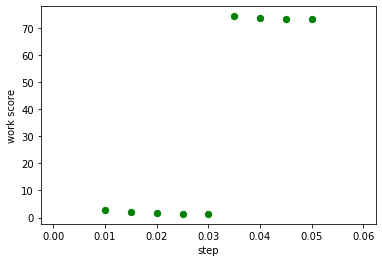

In [38]:
#Визуализируем результаты
import matplotlib.pyplot as plt
x = np.linspace(0.01, 0.05, num=9)
y = np.array(scores, dtype=np.float32)

plt.xlabel('step')
plt.ylabel('work score')
plt.scatter(x, y, 40, 'g', 'o')
plt.show()

In [39]:
#Видим что хотя на начальном этапе увеличение шага приводит к некоторому сокращению времени работы алгоритма,
#но на определённом значении небольшое увеличение коеффициента шага градиентного спуска
#уже приводит к колоссальному росту времени нахождения экстремума с той же точностью.